In [1]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import pingouin as pg
import math

import ipywidgets as widgets

# Enable plots inside the Jupyter Notebook
%matplotlib inline

# Answers- differences between means

Authored by *Todd Gureckis and Brenden Lake* with input from *Matt Crump*.

## Exercise 1: Bootstrapping the t-distribution

<div class="alert alert-info" role="alert">
  <strong>Exercise 1</strong> <br>
    Create a plot of the sampling distribution of the t statistic for 10,000 random normal samples of size 6 and 500.
</div>

(-10.0, 10.0)

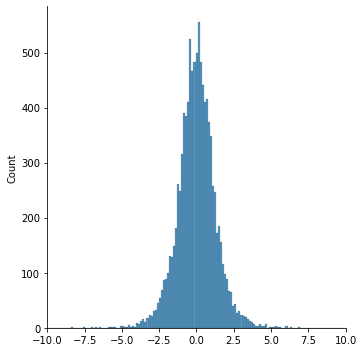

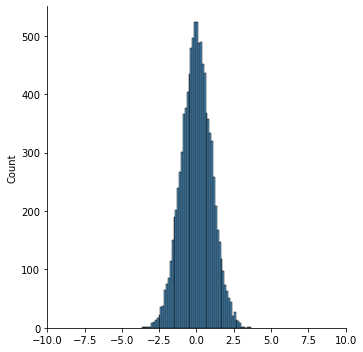

In [2]:
ts=[]
for _ in range(10000): # repeat 10000 times
    r_sample = np.random.normal(0,1,size=6) #set size size according to instruction
    sem = np.std(r_sample,ddof=1)/np.sqrt(len(r_sample))
    t_stat = np.mean(r_sample)/sem
    ts.append(t_stat)
    
ts2=[]
for _ in range(10000):
    r_sample = np.random.normal(0,1,size=500) #set size according to instructions
    sem = np.std(r_sample,ddof=1)/np.sqrt(len(r_sample))
    t_stat = np.mean(r_sample)/sem
    ts2.append(t_stat)
    
sns.displot(ts)
plt.xlim([-10,10])
sns.displot(ts2)
plt.xlim([-10,10])

<div class="alert alert-success" role="alert">
  <strong>Stop and think</strong> <br>
    Do these distibutions look identical?  What is different and why?
</div>

These sample statistics follow a t-distribution, which is the basis of the t-test. 

You'll note the distributions are quite similar, except there are wider tails in the case with only 6 samples. This is because the t-distribution approaches the normal with more samples (with more degrees of freedom).

## Exercise 2: Relationship between p and t values

<div class="alert alert-info" role="alert">
  <strong>Exercise 2</strong> <br>
    Using the following interactive widget, explore the critical value of t shown for different degrees of freedom (sample sizes) and alpha levels.  Report in a cell below the critical value for a t-distribution with 9 degrees of freedom and alpha is 0.05, the critival value for a t-distribution with 50 degrees of freedom and alpha 0.05, and the critical value of a t-distribution with 25 degrees of freedom and alpha = 0.4.
</div>

In [3]:
@widgets.interact(dof=widgets.IntSlider(min=1, max=53, step=1, value=10), alpha=widgets.FloatSlider(min=0,max=0.5, step=0.01, value=0.2))
def plot_t_onsided(dof, alpha):
    fix, ax = plt.subplots(1,1,figsize=(10,6))

    x=np.linspace(-3.5,3.5,100)
    y=stats.t.pdf(x,df=dof)
    t_crit=stats.t.ppf(1.0-alpha, df=dof)
    print(t_crit)
    ax.plot(x,y)
    ax.set_ylabel("probability")
    ax.set_xlabel("value of t statistic")
    ax.set_title("One Sided Test")
    ax.fill_between(x,y,where=x>t_crit,interpolate=True,facecolor='lightblue',alpha=0.2,hatch='/',edgecolor='b')
    ax.set_xticks([0, t_crit])
    #ax.set_yticklabels([])


    sns.despine(top=True, right=True, left=True)

    plt.show()

interactive(children=(IntSlider(value=10, description='dof', max=53, min=1), FloatSlider(value=0.2, descriptio…

<div class="alert alert-success" role="alert">
  <strong>Stop and think</strong> <br>
    How do the critival values change based on sample size?
</div>

Your answer goes here 

- 9 df, alpha 0.05 : crit val 1.83
- 50 df, alpha 0.05 : crit val 1.676
- 25 df, alpha 0.4 : crit val 0.256

When we have higher df (larger sample size), the distribution of the t-statistic will have smaller tails and more closely approximate the normal. Thus, the critical value is lower for df=50 than df=9.

## Exercise 3: Computing a one sample t-test by hand

<div class="alert alert-info" role="alert">
  <strong>Exercise 3</strong> <br>
    The following cell defines a small dataset as a numpy array.  Compute the t-value for this array under the null hypothesis that the true mean is 0.25.  You will find the functions np.mean(), np.std(), and np.sqrt() useful.  Print the t-value out in a cell by itself.  Then use the stats.t.cdf() function to compute the p-value associated with that t using a one sided test. 
</div>

In [4]:
# Your answer here
scores=np.array([.5,.56,.76,.8,.9])  # here is your data
# compute the "effect" (i.e., difference between the mean of the values and the null hypothesis)
# compute the error (i.e., the standard error of the mean), pay attention to whether you are dividing by n-1 or n
# compute the t-value
# use stats.t.cdf() to compute the area in the tail of the correct t-distribution for a one sided test.

In [6]:
# Your answer here

scores=np.array([.5,.56,.76,.8,.9])  # here is your data

# compute the "effect" (i.e., difference between the mean of the values and the null hypothesis)
delta = np.mean(scores)-0.25

# compute the error (i.e., the standard error of the mean)
n = len(scores)
se = np.std(scores, ddof=1) / np.sqrt(n)

# Pay attention to the degrees of freedom!!
# compute the t-value
# use stats.t.cdf() to compute the area in the tail of the correct t-distribution for a one sided test.

t_stat = delta / se
pval = 1-stats.t.cdf(t_stat,df=n-1)

(pval, t_stat, n-1)

(0.0018983152219906874, 6.03672166714376, 4)

<div class="alert alert-success" role="alert">
  <strong>Stop and think</strong> <br>
    If you have trouble, try Googling these functions to find information about the arguments!
</div>

## Exercise 4: Using `pingouin` to do a on sample `ttest()`

<div class="alert alert-info" role="alert">
  <strong>Exercise 4</strong> <br>
    The following cell shows how to do a one sample t-test from a numpy array.  Repeat this for the null hypothesis of 0.25, 0.5, and 0.75.  All tests should be one-sided.  Write one sentence below each t-test to describe how you would report the test in a paper.
</div>

In [7]:
scores=np.array([.5,.56,.76,.8,.9])
print(np.mean(scores))
pg.ttest(x=scores, y=0.25, alternative='greater')

0.704


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.036722,4,greater,0.001898,"[0.54, inf]",2.699704,28.44,0.999169


With a mean of 0.704, we find that the scores are significantly greater than 0.25 ( t(4)=6.04, p < 0.01)

In [34]:
import pingouin as pg
scores=np.array([.5,.56,.76,.8,.9])
pg.ttest(x=scores, y=0.5, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.712536,4,greater,0.026699,"[0.54, inf]",1.213083,4.235,0.719802


With a mean of 0.704, we find that the scores are significantly greater than 0.5 ( t(4)=2.71, p < 0.05)

In [36]:
import pingouin as pg
scores=np.array([.5,.56,.76,.8,.9])
pg.ttest(x=scores, y=0.75, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.61165,4,greater,0.713087,"[0.54, inf]",0.273538,0.923,0.015119


With a mean of 0.704, we find that the scores are not significantly greater than 0.75 ( t(4)=0.61, p > 0.05)

## Exercise 5: Paired t-test example

### STUDY DESCRIPTION

Parents often sing to their children and, even as infants, children listen to and look at their parents while they are singing. Research by Mehr, Song, and Spelke (2016) sought to explore the psychological function that music has for parents and infants, by examining the hypothesis that particular melodies convey important social information to infants. Specifically, melodies convey information about social affiliation.

The authors argue that melodies are shared within social groups. Whereas children growing up in one culture may be exposed to certain songs as infants (e.g., “Rock-a-bye Baby”), children growing up in other cultures (or even other groups within a culture) may be exposed to different songs. Thus, when a novel person (someone who the infant has never seen before) sings a familiar song, it may signal to the infant that this new person is a member of their social group.

To test this hypothesis, the researchers recruited 32 infants and their parents to complete an experiment. During their first visit to the lab, the parents were taught a new lullaby (one that neither they nor their infants had heard before). The experimenters asked the parents to sing the new lullaby to their child every day for the next 1-2 weeks.

Following this 1-2 week exposure period, the parents and their infant returned to the lab to complete the experimental portion of the study. Infants were first shown a screen with side-by-side videos of two unfamiliar people, each of whom were silently smiling and looking at the infant.The researchers recorded the looking behavior (or gaze) of the infants during this ‘baseline’ phase. Next, one by one, the two unfamiliar people on the screen sang either the lullaby that the parents learned or a different lullaby (that had the same lyrics and rhythm, but a different melody).  Finally, the infants saw the same silent video used at baseline, and the researchers again recorded the looking behavior of the infants during this ‘test’ phase.For more details on the experiment’s methods, please refer to Mehr et al. (2016) Experiment 1.

The first thing to do is download the .csv formatted data file, using the link above, or just click [here](http://gureckislab.org/courses/fall19/labincp/data/MehrSongSpelke2016.csv). 

In [41]:
# get the baby data frame
baby_df = pd.read_csv('http://gureckislab.org/courses/fall19/labincp/data/MehrSongSpelke2016.csv')
# filter to only have the data from experiment 1
experiment_one_df = baby_df[baby_df['exp1']==1]
experiment_one_df.head()

,id,study_code,exp1,exp2,exp3,exp4,exp5,dob,dot1,dot2,...,dtword13,dtnoword13,totsing14,babylike14,singcomf14,totrecord14,othersong14,dtword14,dtnoword14,filter_$
0,101,"""LUL""",1,0,0,,,09oct2012,29mar2013,05apr2013,...,0,0,,,,,,0,0,1
1,102,"""LUL""",1,0,0,,,16nov2012,10may2013,17may2013,...,0,0,,,,,,0,0,1
2,103,"""LUL""",1,0,0,,,26nov2012,11may2013,20may2013,...,0,0,,,,,,0,0,1
3,104,"""LUL""",1,0,0,,,19nov2012,11may2013,18may2013,...,0,0,,,,,,0,0,1
4,105,"""LUL""",1,0,0,,,29nov2012,15may2013,29may2013,...,0,0,4,3,4,0,0,0,0,1


### Baseline phase: Conduct a one sample t-test

You first want to show that infants' looking behavior did not differ from chance during the baseline trial. The baseline trial was 16 seconds long. During the baseline, infants watched a video of two unfamiliar people, one of the left and one on the right. There was no sound during the baseline. Both of the actors in the video smiled directly at the infant.

The important question was to determine whether the infant looked more or less to either person. If they showed no preference, the infant should look at both people about 50% of the time. How could we determine whether the infant looked at both people about 50% of the time?

The `experiment_one_df` data frame has a column called `Baseline_Proportion_Gaze_to_Singer`. All of these values show how the proportion of time that the infant looked to the person who would later sing the familiar song to them. If the average of these proportion is .5 across the infants, then we would have some evidence that the infants were not biased at the beginning of the experiment. However, if the infants on average had a bias toward the singer, then the average proportion of the looking time should be different than .5.

Using a one-sample t-test, we can test the hypothesis that our sample mean for the `Baseline_Proportion_Gaze_to_Singer` was not different from .5.


<div class="alert alert-info" role="alert">
  <strong>Exercise 6</strong> <br>
    The cell below shows how to get the looking time proportions from the baseline phase.  Conduct a one-sample t-test using pinguoin to see if this data is different than a null hypothesis of 0.5 (no preference).</div>

In [42]:
# here is how to get the column
experiment_one_df['Baseline_Proportion_Gaze_to_Singer']

0     0.437126
1     0.412533
2     0.754491
3     0.438878
4     0.474645
5     0.870902
6     0.236715
7     0.759259
8     0.416335
9     0.799534
10    0.378677
11    0.697892
12    0.593407
13    0.614907
14    0.614907
15    0.316832
16    0.310417
17    0.504367
18    0.469340
19    0.504082
20    0.564033
21    0.256637
22    0.700000
23    0.382353
24    0.371859
25    0.284464
26    0.767816
27    0.473786
28    0.821218
29    0.590164
30    0.422037
31    0.435484
Name: Baseline_Proportion_Gaze_to_Singer, dtype: float64

In [46]:
# Answer goes here
print('my mean = ', experiment_one_df['Baseline_Proportion_Gaze_to_Singer'].mean())
pg.ttest(x=experiment_one_df['Baseline_Proportion_Gaze_to_Singer'], y=0.5)

my mean =  0.5210966749999999


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.674375,31,two-sided,0.505071,"[0.46, 0.58]",0.119214,0.233,0.100209


Remember how the experiment went. Infants watched silent video recordings of two women (Baseline). Then each person sung a song, one was familiar to the infant (their parents sung the song to them many times), and one was unfamiliar (singing phase). After the singing phase, the infants watched the silent video of the two singers again (test phase). The critical question was whether the infants would look more to the person who sung the familiar song compared to the person who sun the unfamiliar song, which is recorded as `Test_Proportion_Gaze_to_Singer`. If the infants did this, they should look more than 50% of the time to the singer who sang the familiar song. We have the data, we can do another one sample t-test to find out.

<div class="alert alert-info" role="alert">
    The cell below shows how to get the looking time proportions from the test phase.  First conduct a one sample t-test on this test data compared to a null hypothesis of 0.5.  What do you find?  Finally, conduct a paired t-test between the baseline and test phase using pinguoin to see if this data is different than a null hypothesis of 0.0 (no difference).
</div>

In [116]:
# here is how to get the column
experiment_one_df['Test_Proportion_Gaze_to_Singer']

0     0.602740
1     0.683027
2     0.724138
3     0.281654
4     0.498542
5     0.950920
6     0.417755
7     0.938202
8     0.500000
9     0.586294
10    0.472623
11    0.508380
12    0.811189
13    0.571802
14    0.777448
15    0.262846
16    0.507937
17    0.436975
18    0.542105
19    0.600897
20    0.418675
21    0.789474
22    0.760108
23    0.623894
24    0.366412
25    0.461539
26    0.899521
27    0.531100
28    0.541899
29    0.700389
30    0.762963
31    0.460274
Name: Test_Proportion_Gaze_to_Singer, dtype: float64

In [47]:
# Answer goes here
print('my mean = ', experiment_one_df['Test_Proportion_Gaze_to_Singer'].mean())
pg.ttest(x=experiment_one_df['Test_Proportion_Gaze_to_Singer'], y=0.5)

my mean =  0.59349125


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.959714,31,two-sided,0.005856,"[0.53, 0.66]",0.523208,6.959,0.817784


<div class="alert alert-info" role="alert">
Alright. What did we find? You should take a stab at writing down what we found. You can use the same kind of language that I used from the first one sample-test. You should state the mean proportion, the t-value, the dfs, and the p-value. You should be able to answer the question, did the infants look longer at the singer who sang the familiar song? And, did they look longer than would be consist with chance at 50%.
    </div>

With an average looking proportio of 59.3%, infants looked significant longer at the adult who sang the familiar song during the test phase ( t(31)=2.95, p < .01)